In [1]:
#0 본격적인 시작 전에
import numpy as np
import pandas as pd

In [2]:
#1.1 데이터 불러오기
data=pd.read_csv('data.csv')

In [3]:
#1.2 데이터확인 head()이용
data.head()

,transaction_id,apartment_id,city,dong,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,transaction_real_price
0,0,7622,서울특별시,신교동,6-13,신현(101동),신교동 6-13 신현(101동),84.82,2002,200801,21~31,2,37500
1,1,5399,서울특별시,필운동,142,사직파크맨션,필운동 142 사직파크맨션,99.17,1973,200801,1~10,6,20000
2,2,3578,서울특별시,필운동,174-1,두레엘리시안,필운동 174-1 두레엘리시안,84.74,2007,200801,1~10,6,38500
3,3,10957,서울특별시,내수동,95,파크팰리스,내수동 95 파크팰리스,146.39,2003,200801,11~20,15,118000
4,4,10639,서울특별시,내수동,110-15,킹스매너,내수동 110-15 킹스매너,194.43,2004,200801,21~31,3,120000


In [4]:
#1.2 데이터확인-결측값 확인
data.isnull()

,transaction_id,apartment_id,city,dong,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,transaction_real_price
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1216548,False,False,False,False,False,False,False,False,False,False,False,False,False
1216549,False,False,False,False,False,False,False,False,False,False,False,False,False
1216550,False,False,False,False,False,False,False,False,False,False,False,False,False
1216551,False,False,False,False,False,False,False,False,False,False,False,False,False


In [5]:
#1.3 불필요한 행 삭제
data_d=data[data['city']=='부산광역시'].index
data.drop(data_d,inplace=True)
print(data)

         transaction_id  apartment_id   city dong   jibun        apt  \
0                     0          7622  서울특별시  신교동    6-13   신현(101동)   
1                     1          5399  서울특별시  필운동     142     사직파크맨션   
2                     2          3578  서울특별시  필운동   174-1     두레엘리시안   
3                     3         10957  서울특별시  내수동      95      파크팰리스   
4                     4         10639  서울특별시  내수동  110-15       킹스매너   
...                 ...           ...    ...  ...     ...        ...   
1184014         1196844           996  서울특별시  강일동     717  고덕리엔파크2단지   
1184015         1196846           682  서울특별시  강일동     674  강일리버파크3단지   
1184016         1196847           682  서울특별시  강일동     674  강일리버파크3단지   
1184017         1196848           680  서울특별시  강일동     665  강일리버파크1단지   
1184018         1196849           996  서울특별시  강일동     717  고덕리엔파크2단지   

                   addr_kr  exclusive_use_area  year_of_completion  \
0        신교동 6-13 신현(101동)               84.82                200

In [6]:
#1.3 불필요한 행 삭제-재정렬
data.reset_index(drop=True,inplace=True)
print(data)

        transaction_id  apartment_id   city dong   jibun        apt  \
0                    0          7622  서울특별시  신교동    6-13   신현(101동)   
1                    1          5399  서울특별시  필운동     142     사직파크맨션   
2                    2          3578  서울특별시  필운동   174-1     두레엘리시안   
3                    3         10957  서울특별시  내수동      95      파크팰리스   
4                    4         10639  서울특별시  내수동  110-15       킹스매너   
...                ...           ...    ...  ...     ...        ...   
742280         1196844           996  서울특별시  강일동     717  고덕리엔파크2단지   
742281         1196846           682  서울특별시  강일동     674  강일리버파크3단지   
742282         1196847           682  서울특별시  강일동     674  강일리버파크3단지   
742283         1196848           680  서울특별시  강일동     665  강일리버파크1단지   
742284         1196849           996  서울특별시  강일동     717  고덕리엔파크2단지   

                  addr_kr  exclusive_use_area  year_of_completion  \
0       신교동 6-13 신현(101동)               84.82                2002   
1        

In [7]:
#1.4 변수이름바꾸기
data=data.rename({'transaction_real_price':'price'},axis='columns')
data.head()

,transaction_id,apartment_id,city,dong,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,price
0,0,7622,서울특별시,신교동,6-13,신현(101동),신교동 6-13 신현(101동),84.82,2002,200801,21~31,2,37500
1,1,5399,서울특별시,필운동,142,사직파크맨션,필운동 142 사직파크맨션,99.17,1973,200801,1~10,6,20000
2,2,3578,서울특별시,필운동,174-1,두레엘리시안,필운동 174-1 두레엘리시안,84.74,2007,200801,1~10,6,38500
3,3,10957,서울특별시,내수동,95,파크팰리스,내수동 95 파크팰리스,146.39,2003,200801,11~20,15,118000
4,4,10639,서울특별시,내수동,110-15,킹스매너,내수동 110-15 킹스매너,194.43,2004,200801,21~31,3,120000


In [8]:
#1.5 불필요한 변수 삭제
data=data.drop(columns=['transaction_id','apartment_id','jibun','city'])
data.head()

,dong,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,price
0,신교동,신현(101동),신교동 6-13 신현(101동),84.82,2002,200801,21~31,2,37500
1,필운동,사직파크맨션,필운동 142 사직파크맨션,99.17,1973,200801,1~10,6,20000
2,필운동,두레엘리시안,필운동 174-1 두레엘리시안,84.74,2007,200801,1~10,6,38500
3,내수동,파크팰리스,내수동 95 파크팰리스,146.39,2003,200801,11~20,15,118000
4,내수동,킹스매너,내수동 110-15 킹스매너,194.43,2004,200801,21~31,3,120000


In [9]:
#1.6 연/월 뽑기
data['transaction_year_month']=data['transaction_year_month'].astype(str)
data['transaction_year']=data['transaction_year_month'].str[0:4]
data['transaction_month']=data['transaction_year_month'].str[4:6]
data['transaction_year']=data['transaction_year'].astype(int)
data['transaction_month']=data['transaction_month'].astype(int)
data.head()

,dong,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,price,transaction_year,transaction_month
0,신교동,신현(101동),신교동 6-13 신현(101동),84.82,2002,200801,21~31,2,37500,2008,1
1,필운동,사직파크맨션,필운동 142 사직파크맨션,99.17,1973,200801,1~10,6,20000,2008,1
2,필운동,두레엘리시안,필운동 174-1 두레엘리시안,84.74,2007,200801,1~10,6,38500,2008,1
3,내수동,파크팰리스,내수동 95 파크팰리스,146.39,2003,200801,11~20,15,118000,2008,1
4,내수동,킹스매너,내수동 110-15 킹스매너,194.43,2004,200801,21~31,3,120000,2008,1


In [10]:
#1.7 필요연도 뽑기
data=data[data['transaction_year']>=2012]
data.reset_index(drop=True)
print(data)

       dong              apt                addr_kr  exclusive_use_area  \
1770    사직동  광화문풍림스페이스본(9-0)  사직동 9 광화문풍림스페이스본(9-0)               95.88   
1771    사직동  광화문풍림스페이스본(9-0)  사직동 9 광화문풍림스페이스본(9-0)              108.55   
1772    사직동  광화문풍림스페이스본(9-0)  사직동 9 광화문풍림스페이스본(9-0)               94.51   
1773    수송동         로얄팰리스스위트        수송동 85 로얄팰리스스위트               42.87   
1774    수송동         로얄팰리스스위트        수송동 85 로얄팰리스스위트               39.67   
...     ...              ...                    ...                 ...   
742280  강일동        고덕리엔파크2단지      강일동 717 고덕리엔파크2단지               59.72   
742281  강일동        강일리버파크3단지      강일동 674 강일리버파크3단지               59.87   
742282  강일동        강일리버파크3단지      강일동 674 강일리버파크3단지               84.74   
742283  강일동        강일리버파크1단지      강일동 665 강일리버파크1단지               84.74   
742284  강일동        고덕리엔파크2단지      강일동 717 고덕리엔파크2단지               84.98   

        year_of_completion transaction_year_month transaction_date  floor  \
1770                  

In [11]:
#2.0 데이터 시각화
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 0, 'Price')

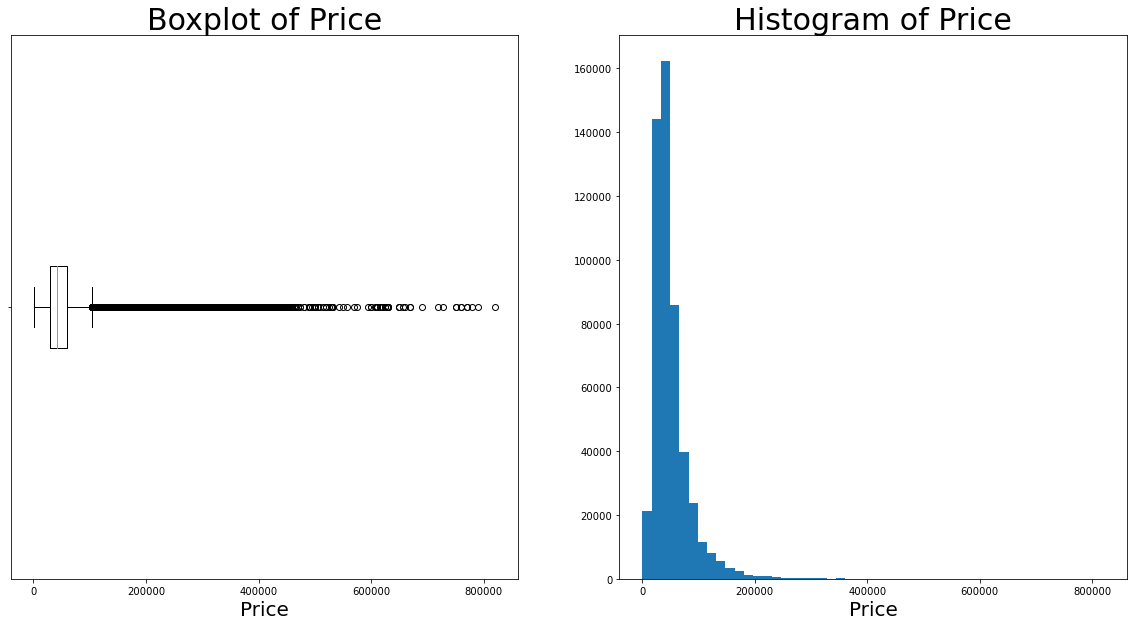

In [12]:
#2.1 거래가격 분포 확인
#아파트 가격들이 주로 0과 20만 사이에 측정되어있다. 특히, 10만대가 제일 많다. 
firstplot=plt.figure(figsize=(20,10))
axes1=firstplot.add_subplot(1,2,1)
axes2=firstplot.add_subplot(1,2,2)
axes1.boxplot(x='price',data=data,vert=False)
axes1.set_title('Boxplot of Price',fontsize=30)
axes1.set(yticklabels=[])
axes2.hist(x='price',data=data,bins=50)
axes2.set_title('Histogram of Price',fontsize=30)
axes1.set_xlabel('Price',fontsize=20)
axes2.set_xlabel('Price',fontsize=20)

Text(0.5, 0, 'Price')

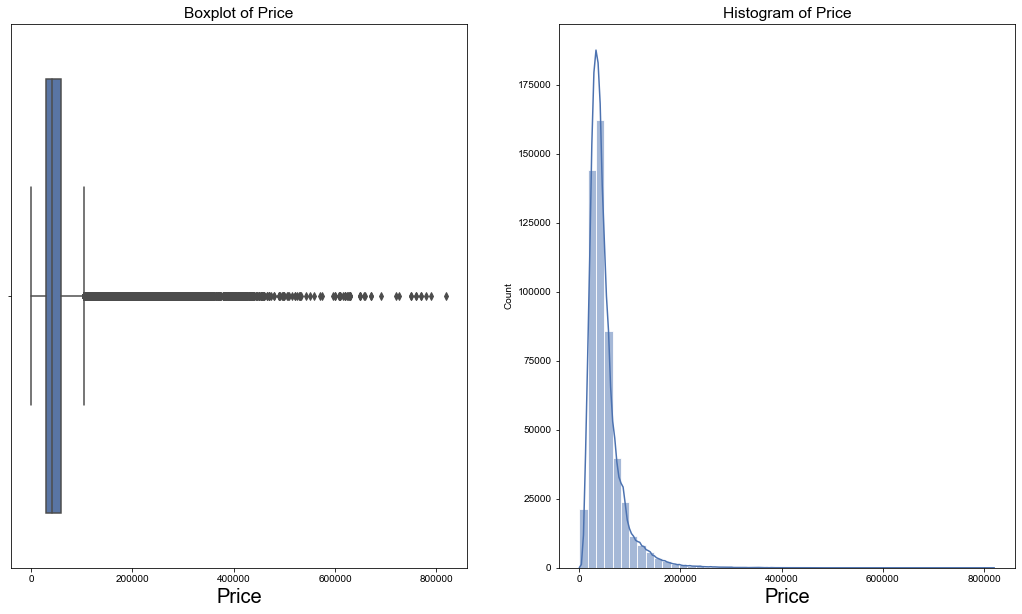

In [13]:
fig,axs=plt.subplots(ncols=2,figsize=(18,10))
sns.set(font_scale=1.3)
sns.boxplot(ax=axs[0],x='price',data=data)
sns.histplot(ax=axs[1],x='price',data=data,bins=50,kde=True)
axs[0].set_title('Boxplot of Price')
axs[1].set_title('Histogram of Price')
axs[0].set_xlabel('Price',fontsize=20)
axs[1].set_xlabel('Price',fontsize=20)

<AxesSubplot:xlabel='transaction_year', ylabel='price'>

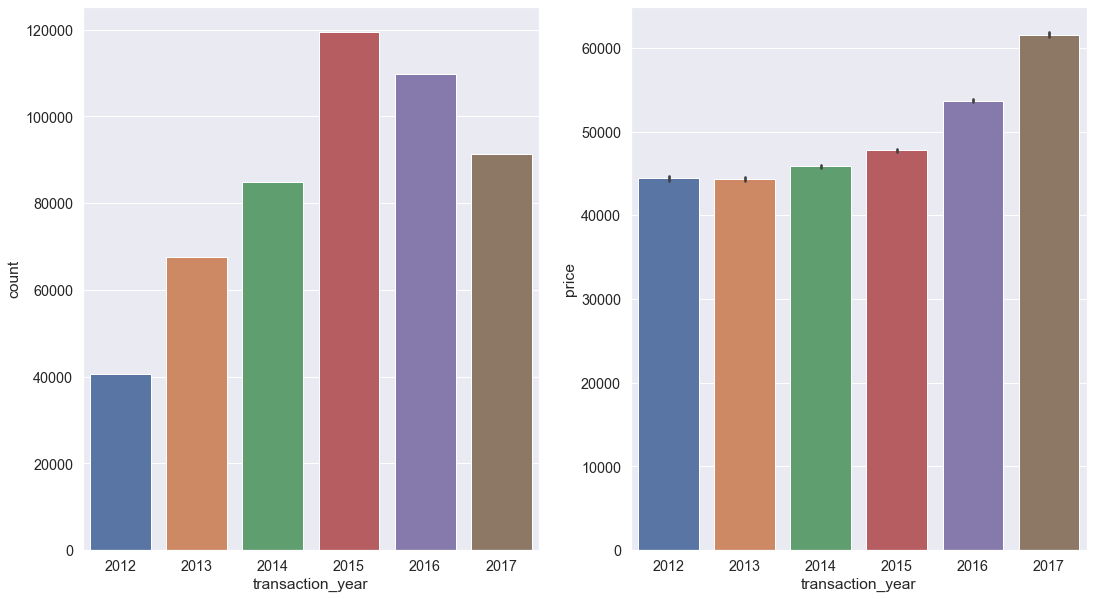

In [14]:
#2.2 거래연도 분포 확인/거래연도별 가격 분포 확인
#2015년도에 아파트 거래가 제일 많았고, 거래가격은 2017년도가 제일 높다. 
fig, axes = plt.subplots(1, 2, figsize=(18,10))
sns.countplot(ax=axes[0],x='transaction_year',data=data)
sns.barplot(ax=axes[1],x='transaction_year',y='price',data=data)

[]

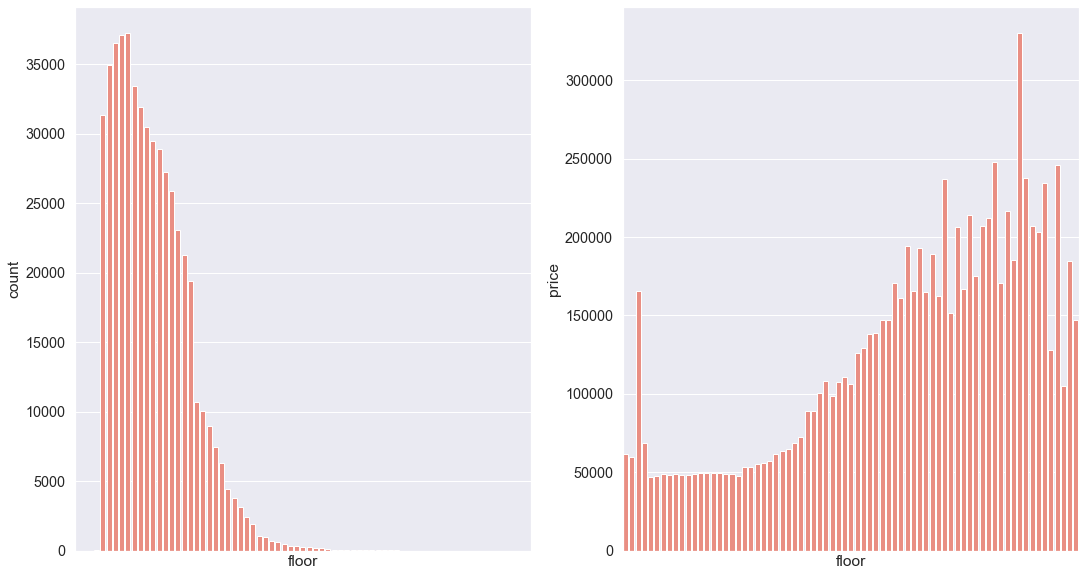

In [15]:
#2.3 층분포확인/층별 가격 분포확인
#고층일수록 가격은 전체적으로 비싸다. 하지만 제일 높은 층보다 3층정도가 더 비싸게 나왔다. 
fig, axes = plt.subplots(1, 2, figsize=(18,10))
sns.countplot(ax=axes[0],x='floor',data=data,color='salmon')
sns.barplot(ax=axes[1],x='floor',y='price',ci=None,data=data,color='salmon')
axes[0].xaxis.set_ticks([])
axes[1].xaxis.set_ticks([])

[]

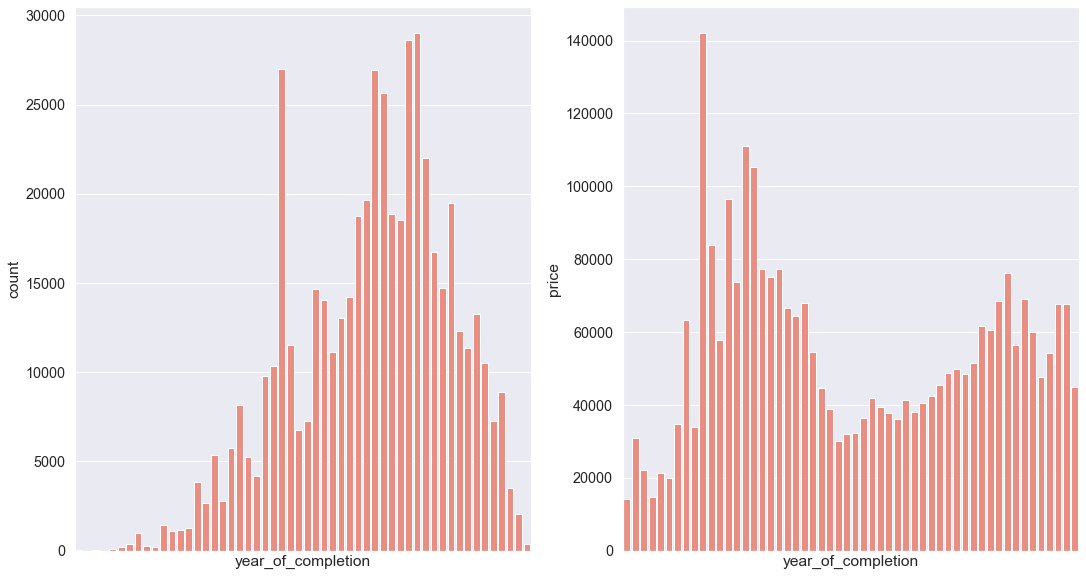

In [16]:
#2.4 완공연도 분포확인/완공연도별 가격 분포 확인
#대체적으로 중후반 쯤에 아파드들이 완공이 되었지만, 가격은 초중반에 완공되었던 아파트들이 높게 특정되었다.
fig, axes = plt.subplots(1, 2, figsize=(18,10))
sns.countplot(ax=axes[0],x='year_of_completion',data=data,color='salmon')
sns.barplot(ax=axes[1],x='year_of_completion',y='price',ci=None,data=data,color='salmon')
axes[0].xaxis.set_ticks([])
axes[1].xaxis.set_ticks([])

[]

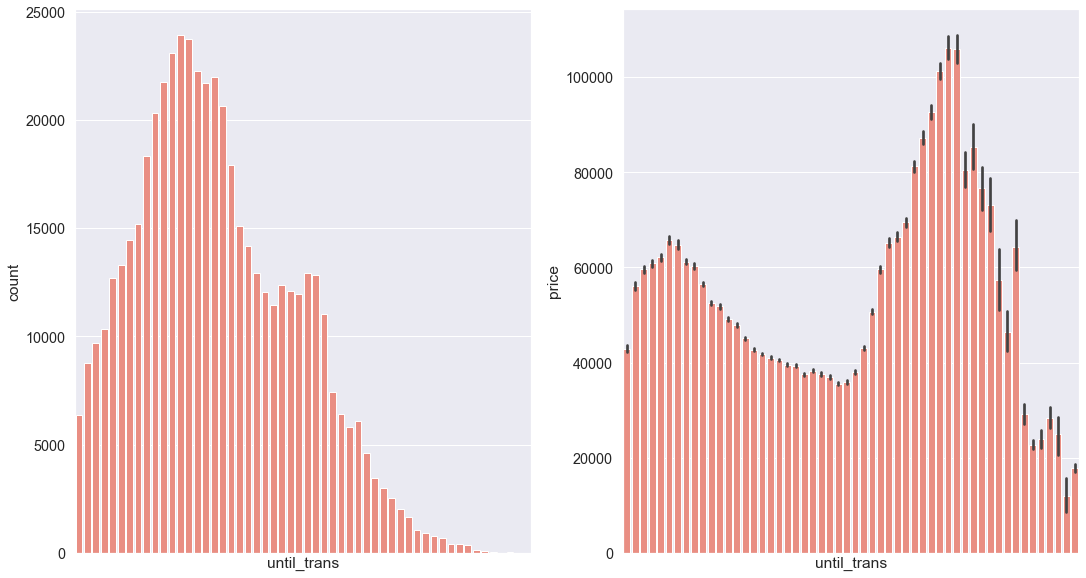

In [17]:
#3.1 아파트 연차 변수 생성
#연차 가격은 조금 오래될수록 높지만 너무 오래되었다고 높은건 아니다. 
#파생변수:가격차이
data['until_trans']=data['transaction_year']-data['year_of_completion']+1
fig, axes = plt.subplots(1, 2, figsize=(18,10))
sns.countplot(ax=axes[0],x='until_trans',data=data,color='salmon')
sns.barplot(ax=axes[1],x='until_trans',y='price',data=data,color='salmon')
axes[0].xaxis.set_ticks([])
axes[1].xaxis.set_ticks([])

In [18]:
#3.2 거래 일 변수 변환
data['transaction_date']=data['transaction_date'].astype(str)
data['transaction_date']=np.where(data['transaction_date']=='1~10','0',(np.where(data['transaction_date']=='11~20','1','2')))
print(data)

       dong              apt                addr_kr  exclusive_use_area  \
1770    사직동  광화문풍림스페이스본(9-0)  사직동 9 광화문풍림스페이스본(9-0)               95.88   
1771    사직동  광화문풍림스페이스본(9-0)  사직동 9 광화문풍림스페이스본(9-0)              108.55   
1772    사직동  광화문풍림스페이스본(9-0)  사직동 9 광화문풍림스페이스본(9-0)               94.51   
1773    수송동         로얄팰리스스위트        수송동 85 로얄팰리스스위트               42.87   
1774    수송동         로얄팰리스스위트        수송동 85 로얄팰리스스위트               39.67   
...     ...              ...                    ...                 ...   
742280  강일동        고덕리엔파크2단지      강일동 717 고덕리엔파크2단지               59.72   
742281  강일동        강일리버파크3단지      강일동 674 강일리버파크3단지               59.87   
742282  강일동        강일리버파크3단지      강일동 674 강일리버파크3단지               84.74   
742283  강일동        강일리버파크1단지      강일동 665 강일리버파크1단지               84.74   
742284  강일동        고덕리엔파크2단지      강일동 717 고덕리엔파크2단지               84.98   

        year_of_completion transaction_year_month transaction_date  floor  \
1770                  

In [19]:
#3.3 월 변수와 10일 단위 변수 통합
data['transaction_date']=data['transaction_date'].astype(int)
data['transaction_month_date']=data['transaction_month']*3+data['transaction_date']
data[['transaction_month_date', 'transaction_month', 'transaction_date']]

,transaction_month_date,transaction_month,transaction_date
1770,3,1,0
1771,4,1,1
1772,4,1,1
1773,3,1,0
1774,5,1,2
...,...,...,...
742280,34,11,1
742281,35,11,2
742282,35,11,2
742283,35,11,2


In [20]:
#3.4 연도별 주기성을 위한 파생변수 생성(삼각변환)
import math
data['sin_date'] = data['transaction_month_date'].apply(lambda x: math.sin(x* math.pi*2 / 12*3))
data['cos_date'] = data['transaction_month_date'].apply(lambda x: math.cos(x* math.pi*2 / 12*3))
# sin-cos으로 변환할때 연속함수로 만들어주기 위해 2*pi 곱해줌

# 파생변수를 위해 생성한 변수들 제거
data = data.drop(columns = ['year_of_completion', 'transaction_year_month', 'transaction_date'])
data = data.drop(columns = ['transaction_month', 'transaction_month_date'])

In [21]:
#3.5 삼각변환을 통한 장점
#더미로 잡을때보다 변수가 줄어들게 되고,35개의 변수를 만드는데, 대부분 0이 되어버림. 정보량이 꽉꽉 담겨있다기보다, 35개 열에 나뉘어 존재한다.
#레이블 인코딩으로 잡지 못하는 주기성을 잡아준다.1월 1-10일이 0으로 인코딩 되고, 12월 21-31이 35로 인코딩 되면 둘은 (주기성이 있다는 가정하에) 매우 가까워야 하는데, 매우 멀게 인코딩된다. 이런거를 잡아줌!

In [22]:
#4.1 아파트 이름 한글부분만 뽑기
data['apt']=data['apt'].str.replace(pat=r'[^\w]',repl=r'',regex=True)
data['apt']=data['apt'].str.replace('\d+','')
data['apt']=data['apt'].str.replace(pat='[a-zA-z]',repl=r'',regex=True)
data['apt']=data['apt'].str.replace(pat='Ⅲ',repl=r'',regex=True)
data.head()

,dong,apt,addr_kr,exclusive_use_area,floor,price,transaction_year,until_trans,sin_date,cos_date
1770,사직동,광화문풍림스페이스본,사직동 9 광화문풍림스페이스본(9-0),95.88,6,70000,2012,5,-1.000000e+00,-1.836970e-16
1771,사직동,광화문풍림스페이스본,사직동 9 광화문풍림스페이스본(9-0),108.55,11,100500,2012,5,-2.449294e-16,1.000000e+00
1772,사직동,광화문풍림스페이스본,사직동 9 광화문풍림스페이스본(9-0),94.51,1,65800,2012,5,-2.449294e-16,1.000000e+00
1773,수송동,로얄팰리스스위트,수송동 85 로얄팰리스스위트,42.87,8,30500,2012,8,-1.000000e+00,-1.836970e-16
1774,수송동,로얄팰리스스위트,수송동 85 로얄팰리스스위트,39.67,15,30500,2012,8,1.000000e+00,3.061617e-16


In [23]:
#4.2 아파트 이름 DTM
from sklearn.feature_extraction.text import CountVectorizer
cvector = CountVectorizer(min_df = 5)
print(cvector.fit_transform(data['apt']).toarray()) # 코퍼스로부터 각 단어의 빈도 수를 기록한다.
#print(cvector.vocabulary_) # 각 단어의 인덱스가 어떻게 부여되었는지를 보여준다.

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [24]:
#4.3 아파트 이름 tf-idf
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfvector = TfidfVectorizer(min_df = 5).fit(data['apt'])
print(tfidfvector.transform(data['apt']).toarray())
#print(tfidfvector.vocabulary_)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [25]:
#4.4 질문
#너무 차원이 증가하는데, 대부분 0을 성분으로 갖는 sparse한 데이터로 바뀜. 각 열이 갖는 정보량이 많지 않다보니 예측에 좋은 영향을 주기 어렵다.
#더불어서 min_df=5로 지정했기 때문에, 등장하지 않는 친구들은 무시된다.
#지역 이름도 안빼줬기 때문에 의도한대로 안나올것이다.

In [26]:
#4.5 질문
#아마 잘 작동하지 않을듯.
#여러 단어들이 같이 혼재해야하는데, '롯데캐슬'이면 롯데캐슬이지 주위에 단어들이 존재하는 것이 아니기 때문에 dense representation이 제대로 이뤄지기 어렵다.

In [27]:
#5
data=data.drop(columns=['addr_kr'])

In [28]:
#5.1 원핫 인코딩
#아파트의 이름 변수들이 많아서 벡터를 저장하기 위해 필요한 공간이 많이 커지게된다.
data_onehot=pd.get_dummies(data.set_index('dong')['apt'].astype(str)).max(level=0).sort_index() 
data_onehot

,,가락그랑밸리,가락금호아파트,가락미륭아파트,가락삼익맨숀,가락스타클래스,가락쌍용차,가락우성,가락차쌍용스윗닷홈동,가락차쌍용스윗닷홈동동,...,힐캐슬,힐타운,힐타워,힐탑,힐탑아파트차,힐탑이루미,힐탑트레져동,힐튼,힐튼빌리지차,힐하우스
dong,,,,,,,,,,,,,,,,,,,,,
가락동,0,1,1,1,0,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
가리봉동,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
가산동,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
가양동,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
갈월동,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
효창동,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
후암동,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
휘경동,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
#5.2 레이블 인코딩-transaction_year
#년도를 단지 숫자를 부여해준 것이기 때문에 문제가 되는건 없다. 오히려 더 깔끔하게 정리된 것 같다. 
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['transaction_year']=le.fit_transform(data['transaction_year'])
data.head()

,dong,apt,exclusive_use_area,floor,price,transaction_year,until_trans,sin_date,cos_date
1770,사직동,광화문풍림스페이스본,95.88,6,70000,0,5,-1.000000e+00,-1.836970e-16
1771,사직동,광화문풍림스페이스본,108.55,11,100500,0,5,-2.449294e-16,1.000000e+00
1772,사직동,광화문풍림스페이스본,94.51,1,65800,0,5,-2.449294e-16,1.000000e+00
1773,수송동,로얄팰리스스위트,42.87,8,30500,0,8,-1.000000e+00,-1.836970e-16
1774,수송동,로얄팰리스스위트,39.67,15,30500,0,8,1.000000e+00,3.061617e-16


In [30]:
#5.3 레이블 인코딩
#int와 같은 숫자에 부여했다면, 예측 성능이 떨어질수도 있었지만, str에 부여했기때문에 큰 문제는 없는 것 같다. 
data_label=data
data_label['dong']=le.fit_transform(data_label['dong'])
data_label['apt']=le.fit_transform(data_label['apt'])
data_label.head()

,dong,apt,exclusive_use_area,floor,price,transaction_year,until_trans,sin_date,cos_date
1770,130,324,95.88,6,70000,0,5,-1.000000e+00,-1.836970e-16
1771,130,324,108.55,11,100500,0,5,-2.449294e-16,1.000000e+00
1772,130,324,94.51,1,65800,0,5,-2.449294e-16,1.000000e+00
1773,164,1319,42.87,8,30500,0,8,-1.000000e+00,-1.836970e-16
1774,164,1319,39.67,15,30500,0,8,1.000000e+00,3.061617e-16


In [31]:
#5.4 mean encoding
#레이블 인코딩과 마찬가지로 문자열에 부여했기에 큰 문제는 없지만, 직관적으로 아파트 이름이나 동을 봐야하는 상황에서 복잡한 숫자로 나타나있으면 불편할 것 같다. 
data_mean = data
apt_mean=data_mean.groupby('apt')['price'].mean()
data_mean['apt']=data_mean['apt'].map(apt_mean)
data_mean.head()

,dong,apt,exclusive_use_area,floor,price,transaction_year,until_trans,sin_date,cos_date
1770,130,93999.183673,95.88,6,70000,0,5,-1.000000e+00,-1.836970e-16
1771,130,93999.183673,108.55,11,100500,0,5,-2.449294e-16,1.000000e+00
1772,130,93999.183673,94.51,1,65800,0,5,-2.449294e-16,1.000000e+00
1773,164,36609.649123,42.87,8,30500,0,8,-1.000000e+00,-1.836970e-16
1774,164,36609.649123,39.67,15,30500,0,8,1.000000e+00,3.061617e-16
